In [355]:
# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/home/sagemaker-user/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/home/sagemaker-user/' 

In [356]:
import os

In [357]:
os. getcwd()

'/root'

In [358]:
os.listdir()

['cont_corr_matrix.png',
 'feature_importance.png',
 'sys_dia_avg.JPG',
 'train.csv',
 '.config',
 '.keras',
 'Fine-Tuning.ipynb',
 'age_diabetes.JPG',
 '.cache',
 'pmlm_models_shallow.ipynb',
 'test.csv',
 '.ipynb_checkpoints',
 'pmlm_utilities_shallow.ipynb',
 '.sagemaker-jumpstart-tasks-status.json',
 '.jupyter',
 '.ipython',
 'Untitled.ipynb',
 '.local',
 'CloudComputing.ipynb',
 '.yarnrc',
 'corr_matrix.png',
 'heart_rate_smoking_chd.JPG',
 'gender_distribution.JPG',
 'target_variable_class_distribution.png',
 'heart_rate_smoking_chd.png',
 'age_group_distribution.JPG',
 'gender_distribution.png',
 'target_variable_class_distribution.jpg',
 'result',
 'feature_importance_rfc.pdf']

In [359]:
# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

In [360]:
bucket = 'cloudcomputingdata'

In [472]:
from sagemaker import get_execution_role
role = get_execution_role()
print(role)

arn:aws:iam::730500136748:role/service-role/AmazonSageMaker-ExecutionRole-20211117T145518


In [362]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [363]:
conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket)['Contents']
files = []
for f in contents:
    files.append(f['Key'])

print(files)

['test_heartdisease.csv', 'train_heartdisease.csv']


In [365]:
df_raw_train = pd.read_csv("train.csv")
df_raw_test = pd.read_csv("test.csv")

In [366]:
df_raw_train.head()

,Unnamed: 0,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [367]:
df_raw_test.head(5)

,Unnamed: 0,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [368]:
# Load the raw training data


# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'TenYearCHD'

In [369]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,3390,18


In [370]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,848,17


In [371]:
df_train['sex'][df_train['sex'] == 'F'] = 0
df_train['sex'][df_train['sex'] == 'M'] = 1
df_train['is_smoking'][df_train['is_smoking'] == 'NO'] = 0
df_train['is_smoking'][df_train['is_smoking'] == 'YES'] = 1
df_train

,Unnamed: 0,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,3388,60,1.0,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [372]:
#devision features into groups
numerical_features=["age","cigsPerDay","BPMeds","sysBP","diaBP","BMI","heartRate","glucose", 'totChol'] #numerical features
categorical_features=["sex","prevalentStroke","prevalentStroke","prevalentHyp", 'diabetes',"education", 'is_smoking'] #categorical features
numerical_dataset=df_train.drop(categorical_features,axis=1) #partial dataset that includes only the numerical features
categorical_dataset=df_train.drop(numerical_features,axis=1) #partial dataset that includes only the categorical features

In [373]:
pip install tensorflow==2.7.0

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [374]:
# The magic below allows us to use tensorflow version 2.x
#%tensorflow_version 1.x 
import tensorflow as tf
from tensorflow import keras

In [375]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [376]:
!pip install plotly==4.14.3

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [377]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [378]:
#Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,2712,18


In [379]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,678,18


In [380]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,BMI
1,BPMeds
2,TenYearCHD
3,Unnamed: 0
4,age
5,cigsPerDay
6,diaBP
7,diabetes
8,education
9,glucose


In [381]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [382]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [383]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [384]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,Unnamed: 0,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,2378,2378,66,1.0,0,0,0.0,1.0,0,1,0,290.0,152.5,90.0,23.63,80.0,76.0,0
1,3182,3182,53,1.0,0,0,0.0,0.0,0,1,0,267.0,152.0,89.0,28.49,94.0,103.0,0
2,921,921,46,3.0,0,1,20.0,0.0,0,0,0,259.0,129.0,83.0,22.91,66.0,84.0,0
3,2244,2244,40,1.0,0,1,50.0,NaN,0,0,0,220.0,124.0,79.0,20.70,90.0,57.0,0
4,3131,3131,51,2.0,0,0,0.0,0.0,0,0,0,234.0,114.0,85.0,28.68,72.0,84.0,0


In [385]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,Unnamed: 0,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,134,134,64,1.0,0,0,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
1,1764,1764,36,2.0,1,1,20.0,0.0,0,1,0,248.0,135.0,94.5,36.52,65.0,85.0,0
2,2465,2465,61,1.0,1,1,13.0,0.0,0,0,0,312.0,110.0,66.0,26.28,68.0,96.0,0
3,1987,1987,51,2.0,0,0,0.0,0.0,0,0,0,233.0,120.0,81.0,28.25,80.0,75.0,0
4,1295,1295,59,4.0,1,1,20.0,0.0,0,1,0,232.0,151.5,110.0,26.89,68.0,69.0,0


In [386]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,Unnamed: 0,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [387]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [388]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,2378
1,3182
2,921
3,2244
4,3131


In [389]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [390]:
# Print the first 5 rows of df_train
df_train.head()

,Unnamed: 0,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,2378,66,1.0,0,0,0.0,1.0,0,1,0,290.0,152.5,90.0,23.63,80.0,76.0,0
1,3182,53,1.0,0,0,0.0,0.0,0,1,0,267.0,152.0,89.0,28.49,94.0,103.0,0
2,921,46,3.0,0,1,20.0,0.0,0,0,0,259.0,129.0,83.0,22.91,66.0,84.0,0
3,2244,40,1.0,0,1,50.0,NaN,0,0,0,220.0,124.0,79.0,20.70,90.0,57.0,0
4,3131,51,2.0,0,0,0.0,0.0,0,0,0,234.0,114.0,85.0,28.68,72.0,84.0,0


In [391]:
# Print the first 5 rows of df_val
df_val.head()

,Unnamed: 0,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,134,64,1.0,0,0,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
1,1764,36,2.0,1,1,20.0,0.0,0,1,0,248.0,135.0,94.5,36.52,65.0,85.0,0
2,2465,61,1.0,1,1,13.0,0.0,0,0,0,312.0,110.0,66.0,26.28,68.0,96.0,0
3,1987,51,2.0,0,0,0.0,0.0,0,0,0,233.0,120.0,81.0,28.25,80.0,75.0,0
4,1295,59,4.0,1,1,20.0,0.0,0,1,0,232.0,151.5,110.0,26.89,68.0,69.0,0


In [392]:
# Print the first 5 rows of df_test
df_test.head()

,Unnamed: 0,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,1,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,2,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,4,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [393]:
# Get the date time variables
datetime_vars = []

In [394]:
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
df_train = datetime_transformer(df_train, datetime_vars)

# Print the first 5 rows of df_train
df_train.head()

,Unnamed: 0,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,2378,66,1.0,0,0,0.0,1.0,0,1,0,290.0,152.5,90.0,23.63,80.0,76.0,0
1,3182,53,1.0,0,0,0.0,0.0,0,1,0,267.0,152.0,89.0,28.49,94.0,103.0,0
2,921,46,3.0,0,1,20.0,0.0,0,0,0,259.0,129.0,83.0,22.91,66.0,84.0,0
3,2244,40,1.0,0,1,50.0,NaN,0,0,0,220.0,124.0,79.0,20.70,90.0,57.0,0
4,3131,51,2.0,0,0,0.0,0.0,0,0,0,234.0,114.0,85.0,28.68,72.0,84.0,0


In [395]:
# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_val = datetime_transformer(df_val, datetime_vars)

# Print the first 5 rows of df_val
df_val.head()

,Unnamed: 0,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,134,64,1.0,0,0,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
1,1764,36,2.0,1,1,20.0,0.0,0,1,0,248.0,135.0,94.5,36.52,65.0,85.0,0
2,2465,61,1.0,1,1,13.0,0.0,0,0,0,312.0,110.0,66.0,26.28,68.0,96.0,0
3,1987,51,2.0,0,0,0.0,0.0,0,0,0,233.0,120.0,81.0,28.25,80.0,75.0,0
4,1295,59,4.0,1,1,20.0,0.0,0,1,0,232.0,151.5,110.0,26.89,68.0,69.0,0


In [396]:
# Call datetime_transformer on df_test
# See the implementation in pmlm_utilities.ipynb
df_test = datetime_transformer(df_test, datetime_vars)

# Print the first 5 rows of df_test
df_test.head()

,Unnamed: 0,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,1,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,2,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,4,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [397]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [398]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,TenYearCHD,0.200094,float64
1,glucose,0.091553,float64
2,education,0.024776,float64
3,BPMeds,0.012506,float64
4,totChol,0.011798,float64
5,cigsPerDay,0.006843,float64
6,BMI,0.004483,float64
7,heartRate,0.000236,float64


In [399]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [400]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,TenYearCHD,0.200094,float64
1,glucose,0.091553,float64
2,education,0.024776,float64
3,BPMeds,0.012506,float64
4,totChol,0.011798,float64
5,cigsPerDay,0.006843,float64
6,BMI,0.004483,float64
7,heartRate,0.000236,float64


In [401]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [402]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [403]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,float64
2,object


In [404]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,sex,4
1,is_smoking,4


In [405]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,Unnamed: 0,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,glucose,TenYearCHD,is_smoking_0,is_smoking_1,is_smoking_NO,is_smoking_YES,sex_0,sex_1,sex_F,sex_M
0,2378,66,1.0,0.0,1.000000,0,1,0,290.0,152.5,...,76.0,0.0,1,0,0,0,1,0,0,0
1,3182,53,1.0,0.0,0.000000,0,1,0,267.0,152.0,...,103.0,0.0,1,0,0,0,1,0,0,0
2,921,46,3.0,20.0,0.000000,0,0,0,259.0,129.0,...,84.0,0.0,0,1,0,0,1,0,0,0
3,2244,40,1.0,50.0,0.030993,0,0,0,220.0,124.0,...,57.0,0.0,0,1,0,0,1,0,0,0
4,3131,51,2.0,0.0,0.000000,0,0,0,234.0,114.0,...,84.0,0.0,1,0,0,0,1,0,0,0


In [406]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,Unnamed: 0,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,glucose,TenYearCHD,is_smoking_0,is_smoking_1,is_smoking_NO,is_smoking_YES,sex_0,sex_1,sex_F,sex_M
0,2378,66,1.0,0.0,1.000000,0,1,0,290.0,152.5,...,76.0,0,1,0,0,0,1,0,0,0
1,3182,53,1.0,0.0,0.000000,0,1,0,267.0,152.0,...,103.0,0,1,0,0,0,1,0,0,0
2,921,46,3.0,20.0,0.000000,0,0,0,259.0,129.0,...,84.0,0,0,1,0,0,1,0,0,0
3,2244,40,1.0,50.0,0.030993,0,0,0,220.0,124.0,...,57.0,0,0,1,0,0,1,0,0,0
4,3131,51,2.0,0.0,0.000000,0,0,0,234.0,114.0,...,84.0,0,1,0,0,0,1,0,0,0


In [407]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [458]:
df_test



,Unnamed: 0,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,glucose,TenYearCHD,is_smoking_0,is_smoking_1,is_smoking_NO,is_smoking_YES,sex_0,sex_1,sex_F,sex_M
0,0,43,2.000000,35.0,0.0,0,0,0,207.0,117.0,...,100.000000,1,0,0,0,1,0,0,0,1
1,1,56,3.000000,0.0,0.0,0,0,0,192.0,122.0,...,58.000000,1,0,0,1,0,0,0,1,0
2,2,58,1.000000,20.0,0.0,0,1,0,260.0,180.0,...,82.061109,1,0,0,0,1,0,0,1,0
3,3,47,3.000000,0.0,0.0,0,0,0,231.0,102.5,...,78.000000,1,0,0,1,0,0,0,1,0
4,4,44,1.000000,0.0,0.0,0,0,0,160.0,118.5,...,82.061109,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,843,46,3.000000,0.0,0.0,0,0,0,277.0,122.5,...,77.000000,1,0,0,1,0,0,0,1,0
844,844,58,2.000000,0.0,0.0,0,0,0,190.0,132.0,...,70.000000,1,0,0,1,0,0,0,1,0
845,845,55,1.000000,0.0,0.0,0,0,0,199.0,134.0,...,82.061109,1,0,0,1,0,0,0,0,1
846,846,45,3.000000,0.0,0.0,0,1,0,231.0,157.5,...,92.000000,1,0,0,1,0,0,0,1,0


In [408]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [409]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [410]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

In [411]:
pip install imblearn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [412]:
from imblearn.over_sampling import SMOTE

# The SMOTE
smote = SMOTE(random_state=random_seed)

# Augment the training data
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

In [413]:
pd.Series(y_smote_train).value_counts()

2    2298
0    2298
dtype: int64

In [414]:
# See the implementation in pmlm_utilities.ipynb
y_smote_gen_ori_train = separate_generate_original(X_smote_train, y_smote_train, X_train, y_train, 1)

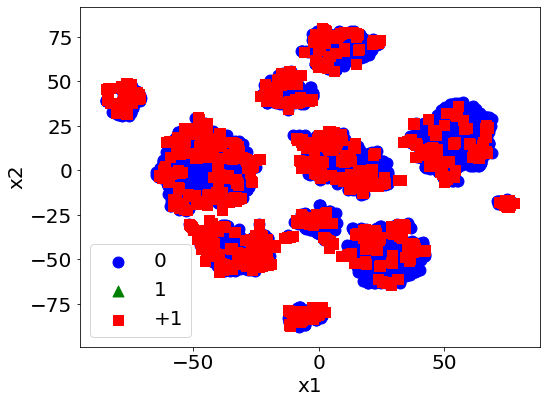

In [415]:
# Plot the scatter plot using TSNE
# See the implementation in pmlm_utilities.ipynb
plot_scatter_tsne(X_smote_train,
                  y_smote_gen_ori_train, 
                  [0, 1, 2],
                  ['0', '1', '+1'],
                  ['blue', 'green', 'red'],
                  ['o', '^', 's'],
                  'bottom-right',
                  'result/ML_Project_results/GridSearchCV/',
                  'scatter_plot_smote.pdf',
                  random_seed)

In [416]:
pip install sklearn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [417]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
#
#
models = {'sgd': SGDRegressor(random_state=random_seed),
          'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

In [418]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [419]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

array([[-0.5460033 ,  5.62689992,  0.68878268, ...,  0.        ,
         0.8989015 ,  1.1725796 ],
       [ 0.65864514, -0.17997406,  1.51804192, ...,  0.        ,
         0.87606413,  0.6598183 ],
       [-0.72446974, -0.17997406, -0.81399183, ...,  0.        ,
        -0.17445495,  0.48146655],
       ...,
       [-1.23756074, -0.17997406,  0.37007484, ...,  0.        ,
        -1.31632351, -1.52499068],
       [-0.22625094, -0.17997406,  1.50153925, ...,  0.        ,
        -0.35715392, -1.39122687],
       [-0.5583968 , -0.17997406, -0.88000252, ...,  0.        ,
         0.60201567, -0.70011382]])

In [420]:
param_grids = {}

In [421]:
# The parameter grid of eta
eta_grid = [0.045, 0.05, 0.055]

# The parameter grid of alpha
alpha_grid = [0.045, 0.05, 0.055]

# Update param_grids
param_grids['sgd'] = [{'model__eta0': eta_grid,
                       'model__alpha': alpha_grid}]

In [422]:
# The parameter grid of tol
tol_grid = [10 ** -6,10 ** -5,10 ** -4]

# The parameter grid of C
C_grid = [0.5, 1, 1.5]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,'model__C': C_grid}]

In [423]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-7, 1)]
#alpha_grids = [0.0156,0.015625,0.0157]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-7, 1)]
#learning_rate_init_grids = [0.005,0.01,0.015]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [424]:
# The grids for min_samples_split
min_samples_split_grids = [24.5,25,25.5]

# The grids for min_samples_leaf
min_samples_leaf_grids = [6.5,7,7.5]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [425]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-1,1)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [100,105,111]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [426]:
# Make directory
directory = os.path.dirname('result/ML_Project_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [464]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    if acronym == 'sgd':
      gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='neg_mean_squared_error',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
    else:
        gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_,])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='result/ML_Project_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
df_best_scores = pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])
df_best_scores.insert(0,'Model', ['Random Forest', 'Gradient Boosting classifier', 'Logistic Regression', 'MLP Classifier', 'SGD Regressor'])
df_best_scores.head()


,Model,best_score,best_param,best_estimator
0,Random Forest,0.633795,"{'model__min_samples_leaf': 7, 'model__min_sam...","((DecisionTreeClassifier(max_features='auto', ..."
1,Gradient Boosting classifier,0.599148,"{'model__learning_rate': 1, 'model__min_sample...",(HistGradientBoostingClassifier(learning_rate=...
2,Logistic Regression,0.588087,"{'model__C': 0.5, 'model__tol': 1e-06}","(LogisticRegression(C=0.5, class_weight='balan..."
3,MLP Classifier,0.531778,"{'model__alpha': 0.1, 'model__learning_rate_in...","(MLPClassifier(alpha=0.1, early_stopping=True,..."
4,SGD Regressor,-0.439446,"{'model__alpha': 0.055, 'model__eta0': 0.045}","(SGDRegressor(alpha=0.055, eta0=0.045, random_..."


In [465]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs_smote = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    if acronym == 'sgd':
      gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='neg_mean_squared_error',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
    else:
        gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_weighted',#'f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_smote_train, y_smote_train)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs_smote.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='result/ML_Project_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs_smote = sorted(best_score_params_estimator_gs_smote, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
smote_model = pd.DataFrame(best_score_params_estimator_gs_smote, columns=['best_score', 'best_param', 'best_estimator'])
smote_model.insert(0,'Model', ['Random Forest', 'Gradient Boosting classifier', 'Logistic Regression', 'MLP Classifier', 'SGD Regressor'])
smote_model.head()

,Model,best_score,best_param,best_estimator
0,Random Forest,0.819843,"{'model__C': 0.5, 'model__tol': 1e-06}","(LogisticRegression(C=0.5, class_weight='balan..."
1,Gradient Boosting classifier,0.784946,"{'model__min_samples_leaf': 7, 'model__min_sam...","((DecisionTreeClassifier(max_features='auto', ..."
2,Logistic Regression,0.671890,"{'model__learning_rate': 1, 'model__min_sample...",(HistGradientBoostingClassifier(learning_rate=...
3,MLP Classifier,0.670588,"{'model__alpha': 1e-07, 'model__learning_rate_...","(MLPClassifier(alpha=1e-07, early_stopping=Tru..."
4,SGD Regressor,-2.312985,"{'model__alpha': 0.045, 'model__eta0': 0.055}","(SGDRegressor(alpha=0.045, eta0=0.055, random_..."


In [452]:
#X_smote_train
y_smote_train



array([0, 0, 0, ..., 2, 2, 2])

In [429]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [430]:
# Make directory
directory = os.path.dirname('/result/ML_Project_results/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [431]:
import os

# Make directory
directory = os.path.dirname('/result/ML_Project_results/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [432]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), 
                         best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,age,0.184249
1,sysBP,0.141961
2,diaBP,0.0899201
3,totChol,0.0887966
4,BMI,0.0875997


In [433]:
df_best_scores
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
#create traces
fig = go.Figure()
trace1 = go.Scatter(
    x = smote_model['Model'],
    y= smote_model['best_score'],
    name='Algorithm Name',
    marker =dict(color='rgba(0,0,0,0.5)',
               line =dict(color='rgb(1,2,3)',width=6)),
                text=df_best_scores.Model
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False),
              title=go.layout.Title(text="Model Evaluation using SMOTE")
              )

fig = go.Figure(data = data, layout = layout)
# iplot(fig)
fig.show()

In [434]:
df_best_scores
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
#create traces
fig = go.Figure()
trace1 = go.Scatter(
    x = df_best_scores['Model'],
    y= df_best_scores['best_score'],
    name='Algorithm Name',
    marker =dict(color='rgba(0,0,0,0.5)',
               line =dict(color='rgb(1,2,3)',width=6)),
                text=df_best_scores.Model
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False),
              title=go.layout.Title(text="Model Evaluation")
              )

fig = go.Figure(data = data, layout = layout)
# iplot(fig)
fig.show()

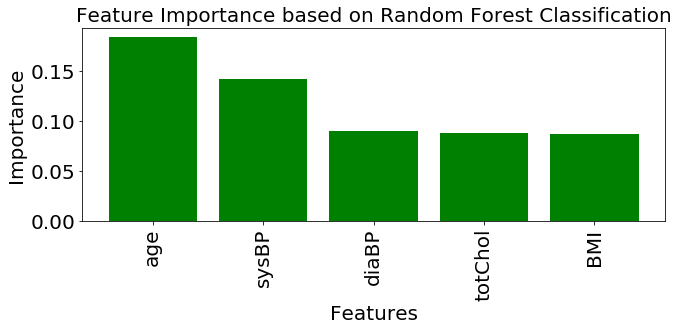

<Figure size 432x288 with 0 Axes>

In [435]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:5], df_fi_rfc['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')
plt.title('Feature Importance based on Random Forest Classification')

# Save and show the figure
plt.tight_layout()
#plt.savefig('/result/ML_Project_results/figure/feature_importance_rfc.pdf')
# plt.savefig('feature_importance_rfc.pdf')
plt.show()
plt.savefig("feature_importance.png")

In [436]:
import os
my_path = os.getcwd()
print(my_path)
my_file = "feature_importance.png"
fig.savefig(os.path.join(my_path, my_file))

/root


In [437]:
s3 = boto3.resource('s3')


In [441]:
file_name = "feature_importance.png"
s3.meta.client.upload_file(file_name, 'www.123456789.gwu.edu', 'assets/img/{}'.format(file_name))

In [ ]:
#Using an Ec2 instance to train a model. 


# sess = sagemaker.Session()

# xgb = sagemaker.estimator.Estimator(
#     container,
#     role,
#     instance_count=1,
#     instance_type="ml.m4.xlarge",
#     output_path="s3://{}/{}/output".format(bucket, prefix),
#     sagemaker_session=sess,
# )
# xgb.set_hyperparameters(
#     max_depth=5,
#     eta=0.2,
#     gamma=4,
#     min_child_weight=6,
#     subsample=0.8,
#     silent=0,
#     objective="binary:logistic",
#     num_round=100,
# )

# xgb.fit({"train": s3_input_train, "validation": s3_input_validation})

References: Huang, James, Case Study, (2021), GitHub repository, https://github.com/yuxiaohuang/